<h1 style="text-align: center; font-size: 36px;">Multi-layer perceptron</h1>

##### Student information:
- Name: Tuan Anh NGUYEN
- Email: tuan.nguyen@etu.univ-cotedazur.fr

---

##### Tasks:

1. Reuse diabete dasatet (sklearn.datasets.load_diabetes)
    - Build an MLP
    - How many parameters we have to find ?
    - Compile / fit and plot learning curve
    - Predict / evaluate 
2. Reuse iris dataset (sklearn.datasets.load_irs)
    - Build an MLP
    - How many parameters we have to find ?
    - Compile / fit and plot learning curve
    - Predict / evaluate

---





First, import the libraries

In [1]:
from sklearn.preprocessing import RobustScaler
from sklearn import datasets
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import root_mean_squared_error as rmse, mean_squared_error as mse

Create the dataset function

In [2]:
def create_training_test_sets(X, y):
    # Create training, test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

    return X_train, X_test, y_train, y_test

Normalize the variables X using Robust Normalization

In [3]:
def normalize_variables(x):
    transformer = RobustScaler().fit(x)
    return transformer.transform(x)

##### 1. Reuse diabete dasatet (sklearn.datasets.load_diabetes)


Loading the data

In [4]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target


In [5]:
X_train, X_test, y_train, y_test = create_training_test_sets(X, y)

Normalize the variables

In [6]:
X_train = normalize_variables(X_train)
X_test = normalize_variables(X_test)
y_train /= np.max(y_train)
y_test /= np.max(y_test)

In [7]:
def MLP_Linear_Regression(n_neuron_hiddenlayer, n_epoch):
    inputs = Input(shape=(X.shape[1], ))			                # Input layer
    x = Dense(n_neuron_hiddenlayer, activation='relu')(inputs)	    # Hidden layer
    outputs = Dense(1, activation='linear')(x)      # Output layer

    model = Model(inputs, outputs) 			        # Build model
    model.summary() 					            # Print the model

    model.compile(optimizer='adam', loss='mse')    # Compile the model

    hstry = model.fit(X_train, y_train, epochs=n_epoch, shuffle=True, validation_split=0.2) # Model fit the dataset

    pd.DataFrame(hstry.history).plot()


    # Evaluate the model on the test data using `evaluate`
    print("================================================")
    print("Evaluate on test data")
    results = model.evaluate(X_test, y_test)
    print("test loss, test acc:", results)

    y_pred = model.predict(X_test)



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 601 (2.35 KB)

 Trainable params: 601 (2.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.4025 - val_loss: 0.2609
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2019 - val_loss: 0.1500
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1049 - val_loss: 0.1018
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0789 - val_loss: 0.0844
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0690 - val_loss: 0.0776
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0593 - val_loss: 0.0732
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0610 - val_loss: 0.0688
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0528 - val_loss: 0.0652
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0523 - val_loss: 0.0628
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0456 - val_loss: 0.0607
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0405 - val_loss: 0.0584
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0459 - val_loss: 0.0567
Epoch 13/50

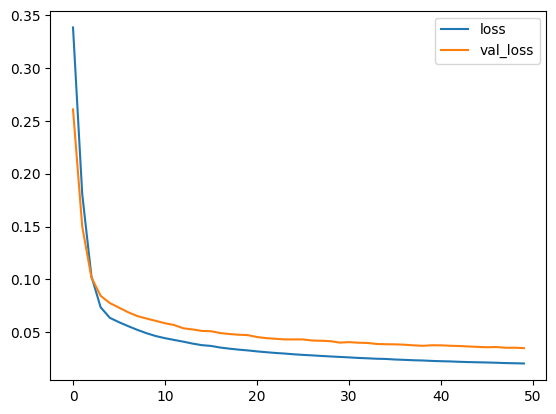

In [8]:
MLP_Linear_Regression(50, 50)

Let's try other parameters

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │         2,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,401 (9.38 KB)

 Trainable params: 2,401 (9.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2687 - val_loss: 0.0933
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0683 - val_loss: 0.0439
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0432 - val_loss: 0.0459
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - val_loss: 0.0379
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0306 - val_loss: 0.0401
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0287 - val_loss: 0.0386
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0246 - val_loss: 0.0370
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0271 - val_loss: 0.0351
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0251 - val_loss: 0.0367
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - val_loss: 0.0362
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - val_loss: 0.0346
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - val_loss: 0.0350
Epoch 13/50


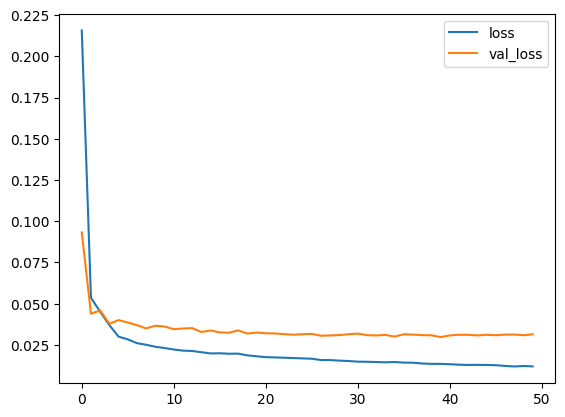

In [9]:
MLP_Linear_Regression(200, 50)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,601 (14.07 KB)

 Trainable params: 3,601 (14.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/70
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1455 - val_loss: 0.0647
Epoch 2/70
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0610 - val_loss: 0.0524
Epoch 3/70
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0382 - val_loss: 0.0525
Epoch 4/70
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0289 - val_loss: 0.0422
Epoch 5/70
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0257 - val_loss: 0.0354
Epoch 6/70
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0252 - val_loss: 0.0364
Epoch 7/70
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0251 - val_loss: 0.0349
Epoch 8/70
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0210 - val_loss: 0.0341
Epoch 9/70
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0224 - val_loss: 0.0335
Epoch 10/70
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0214 - val_loss: 0.0331
Epoch 11/70
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0211 - val_loss: 0.0331
Epoch 12/70
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - val_loss: 0.0312
Epoch 13/70


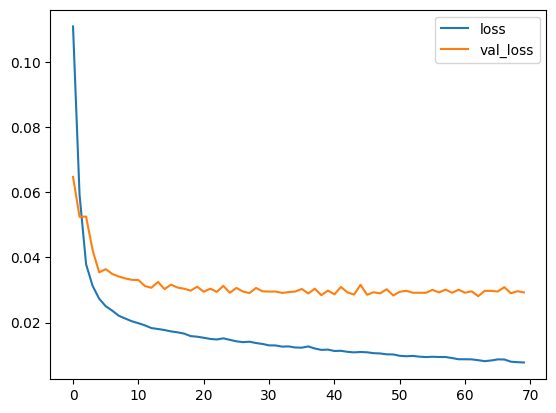

In [10]:
MLP_Linear_Regression(300, 70)

Base on these graphs, we can see that the validation loss values does not change much since the 15th - 20th epoch. If we run this with much bigger epochs or with greater number of neurons of hidden layer, the training loss will decrease and the validation loss will be stay still or increase a little bit. It mighe be the sight of the overfitting. The better parameters might be: neuron of hidden layer = $100 -> 200$ and epoch: $15 -> 25$

##### 2. Reuse iris dasatet (sklearn.datasets.load_iris)


Loading the data

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()

X_iris = iris.data
y_iris = iris.target


In [12]:
X_train, X_test, y_train, y_test = create_training_test_sets(X_iris, y_iris)

Normalize the variables

In [13]:
X_train = normalize_variables(X_train)
X_test = normalize_variables(X_test)

In [14]:
def MLP_Softmax_Regression(n_neuron_hiddenlayer, n_neuron_lastlayer, n_epoch):
    inputs = Input(shape=(X_iris.shape[1], ))			                # Input layer
    x = Dense(n_neuron_hiddenlayer, activation='sigmoid')(inputs)	    # Hidden layer
    outputs = Dense(n_neuron_lastlayer, activation='softmax')(x)      # Output layer

    model = Model(inputs, outputs) 			        # Build model
    model.summary() 					            # Print the model

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')    # Compile the model

    hstry = model.fit(X_train, y_train, epochs=n_epoch, shuffle=True, validation_split=0.2) # Model fit the dataset

    pd.DataFrame(hstry.history).plot()

    # Evaluate the model on the test data using `evaluate`
    print("================================================")
    print("Evaluate on test data")
    results = model.evaluate(X_test, y_test)
    print("test loss, test acc:", results)

    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)




Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1500)           │         7,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,003 (46.89 KB)

 Trainable params: 12,003 (46.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 1.2092 - val_loss: 1.0423
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1495 - val_loss: 1.1632
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0335 - val_loss: 1.2215
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9928 - val_loss: 1.0601
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9685 - val_loss: 0.9481
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9239 - val_loss: 0.9492
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8762 - val_loss: 1.0103
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8651 - val_loss: 0.9804
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8443 - val_loss: 0.8636
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7907 - val_loss: 0.8314
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7537 - val_loss: 0.8864
Epoch 12/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7367 - val_loss

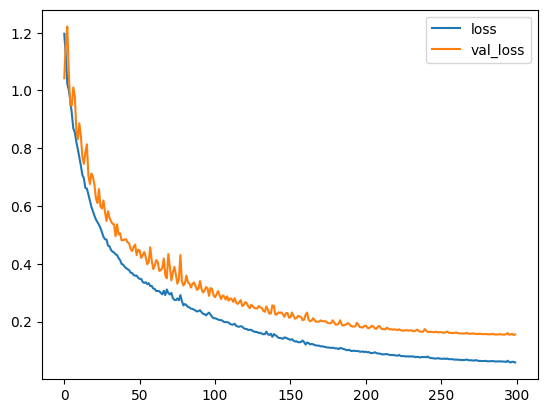

In [15]:
MLP_Softmax_Regression(1500, 3 , 300)

Let's try other parameters

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3000)           │        15,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │         9,003 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,003 (93.76 KB)

 Trainable params: 24,003 (93.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 1.6596 - val_loss: 1.6921
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3821 - val_loss: 1.0339
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0696 - val_loss: 1.0900
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0405 - val_loss: 1.0407
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9442 - val_loss: 1.1443
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9361 - val_loss: 0.9383
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8671 - val_loss: 0.8229
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8004 - val_loss: 0.9047
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7582 - val_loss: 0.9102
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7430 - val_loss: 0.7592
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6974 - val_loss: 0.7396
Epoch 12/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6673 - val_loss:

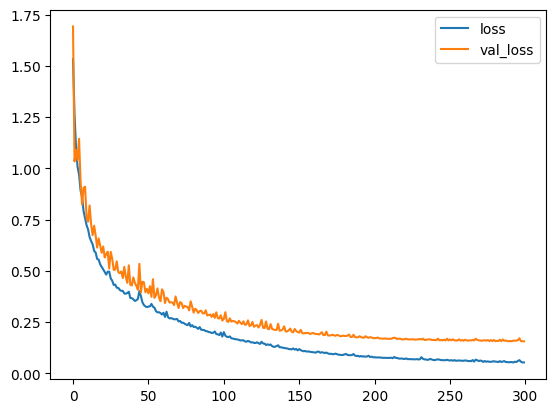

In [16]:
MLP_Softmax_Regression(3000, 3 , 300)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5000)           │        25,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │        15,003 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,003 (156.26 KB)

 Trainable params: 40,003 (156.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 1.7336 - val_loss: 1.1688
Epoch 2/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.4601 - val_loss: 1.5969
Epoch 3/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.4125 - val_loss: 1.3531
Epoch 4/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2492 - val_loss: 1.0341
Epoch 5/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9524 - val_loss: 1.0826
Epoch 6/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9217 - val_loss: 0.8847
Epoch 7/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7532 - val_loss: 0.8610
Epoch 8/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8170 - val_loss: 0.8549
Epoch 9/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7273 - val_loss: 1.0275
Epoch 10/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7267 - val_loss: 0.6753
Epoch 11/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6381 - val_loss: 0.7190
Epoch 12/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6456 - val_lo

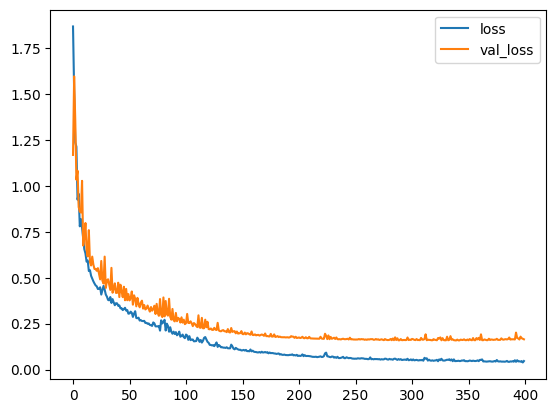

In [17]:
MLP_Softmax_Regression(5000, 3 , 400)

We can see that the validation loss values does not change much since the 250th - 300th epoch. If we run this with much bigger epochs or with greater number of neurons of hidden layer, the training loss will decrease and the validation loss will be stay still or increase a little bit. It mighe be the sight of the overfitting. The better parameters might be: neuron of hidden layer = $1500 -> 3000$ and epoch: $250 -> 300$

---

##### Conclusion:
- Through this part, we've learned Multi-layer Perceptron and the procedure to build the Neural Network model.
- Choosing the best parameters is the most important part of the algorithm and also the most difficult part. We have to look at the evaluation of the model by graph or value to conclude that the model is better or not.

References:
- Tensorflow keras documentations: https://www.tensorflow.org/api_docs/python/tf/keras/,  